## Process 4x4 lattice spin configurations into graphable data

In [21]:
FILENAME = "image4x4"
TEMP_VALS = [0.25, 4.75]
NUM_TEMPS = len(TEMP_VALS)
NUM_BINS = 10000
L = 4

import matplotlib.pyplot as plt
import numpy as np

file_string = "../spinConfigs_" + FILENAME + ".txt"

raw_spin_configs = np.zeros(shape=(NUM_TEMPS,NUM_BINS,L,L))

spin_configs_file = open(file_string, "r")
for row in spin_configs_file:
    row = row.split()
    for item in row:
        raw_spin_configs
    raw_spin_configs.append(row)

# initialize dictionary to store temperature data and corresponding spin configurations
data_dict = {}

# populate keys for dictionary from temperature values
for val in TEMP_VALS:
    data_dict[val] = np.zeros(shape=(NUM_TEMPS, NUM_BINS))

# collect each set of 10000 spin configurations
for temp in range(NUM_TEMPS):
    for bin in range(NUM_BINS):
        data_dict[TEMP_VALS[temp]].append(raw_spin_configs[(temp * NUM_BINS) + bin])

    # convert all data to integers
    for entry in data_dict[TEMP_VALS[temp]]:
        for index in range(L*L):
            entry[index] = int(entry[index])
            if entry[index] == -1:
                entry[index] = 0

    # convert each entry to numpy array
    data_dict[TEMP_VALS[temp]] = np.array(data_dict[TEMP_VALS[temp]])

square_data_dict = {}

# reshape dictionary arrays into LxL instead of 
for temp in range(NUM_TEMPS):
    square_data_dict[TEMP_VALS[temp]] = data_dict[TEMP_VALS[temp]].reshape(NUM_BINS, L, L)

train_labels = np.ones(NUM_BINS)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

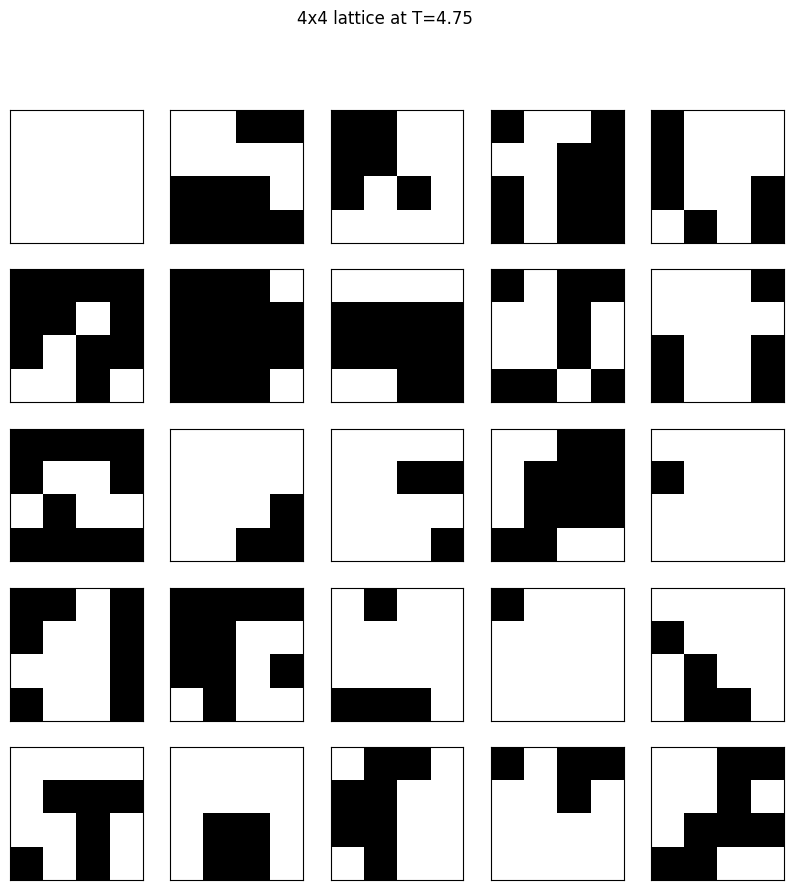

In [18]:
import tensorflow as tf

plt.figure(figsize=(10,10))
plt.suptitle("4x4 lattice at T=4.75")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(square_data_dict[4.75][i], cmap=plt.cm.binary)
plt.show()

## Do the same for 8x8!

In [19]:
class_names = ['Below T_c', 'Above T_c']

In [94]:
FILENAME = "image8x8"

TEMP_VALS = [0.25, 4.75]
NUM_TEMPS = len(TEMP_VALS)
NUM_BINS = 10000
TRAIN_BINS = int(0.8 * NUM_BINS)
TEST_BINS = int(0.2 * NUM_BINS)
NUM_TRAIN = int(TRAIN_BINS * NUM_TEMPS)
NUM_TEST = int(TEST_BINS * NUM_TEMPS)

L = 8

import matplotlib.pyplot as plt
import numpy as np

file_string = "../data/spinconfigs/spinConfigs_" + FILENAME + ".txt"

data = np.loadtxt(file_string)

raw_spin_configs = np.zeros(shape=(NUM_TEMPS, NUM_BINS, L, L))

data_dict = {}

# initialize data dictionary
for temp in range(NUM_TEMPS):
    data_dict[TEMP_VALS[temp]] = []

# convert -1s to 0s
for entry in data:
    for index in range(L*L):
        if entry[index] == -1:
            entry[index] = 0

# extract spin configs values 
for temp in range(NUM_TEMPS):
    for bin in range(NUM_BINS):            
        raw_spin_configs[temp][bin] = data[(temp * NUM_BINS) + bin].reshape(L, L)

# populate data dictionary with numpy array of temps
for temp in range(NUM_TEMPS):
    data_dict[TEMP_VALS[temp]] = raw_spin_configs[temp]

# initialize arrays for training and testing images and labels
train_images = np.zeros(shape=(NUM_TRAIN, L, L))
shuffled_images = train_images

train_labels = np.zeros(NUM_TRAIN, dtype=int)
shuffled_labels = train_labels

test_images = np.zeros(shape=(NUM_TEST, L, L))
shuffled_test_images = test_images

test_labels = np.zeros(NUM_TEST, dtype=int)
shuffled_test_labels = test_labels


# populate train images and train labels with spin configs
offset = 0
for temp, array in data_dict.items():
    train_images[(TRAIN_BINS * offset):(TRAIN_BINS * (offset+1))] = array[0:TRAIN_BINS]
    test_images[(TEST_BINS * offset):(TEST_BINS * (offset+1))] = array[TRAIN_BINS:]
    
    # if lower than T_c, should be a 0
    if temp < 2.269:
        train_labels[(TRAIN_BINS * offset):(TRAIN_BINS * (offset+1))] = np.zeros(TRAIN_BINS)
        test_labels[(TEST_BINS * offset):(TEST_BINS * (offset+1))] = np.zeros(TEST_BINS)
    else:
        train_labels[(TRAIN_BINS * offset):(TRAIN_BINS * (offset+1))] = np.ones(TRAIN_BINS)
        test_labels[(TEST_BINS * offset):(TEST_BINS * (offset+1))] = np.ones(TEST_BINS)
    
    offset += 1

def shuffle_pairs(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


# shuffle our images and labels according to the same permutation
shuffled_images, shuffled_labels = shuffle_pairs(train_images, train_labels)

# shuffle test images and labels
shuffled_test_images, shuffled_test_labels = shuffle_pairs(test_images, test_labels)

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(L, L)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [80]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
model.fit(shuffled_images, shuffled_labels, epochs=10)

Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 0.0919 - accuracy: 0.9852
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9999
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 6.7280e-04 - accuracy: 1.0000
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 4.2664e-04 - accuracy: 1.0000
Epoch 7/10
500/500 [==============================] - 1s 3ms/step - loss: 2.8799e-04 - accuracy: 1.0000
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 1.8942e-04 - accuracy: 1.0000
Epoch 9/10
500/500 [==============================] - 1s 3ms/step - loss: 1.3483e-04 - accuracy: 1.0000
Epoch 10/10
500/500 [==============================] - 1s 2ms/step - loss: 9.944

In [82]:
test_loss, test_acc = model.evaluate(shuffled_test_images,  shuffled_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

125/125 - 0s - loss: 3.5310e-04 - accuracy: 0.9998 - 441ms/epoch - 4ms/step

Test accuracy: 0.999750018119812


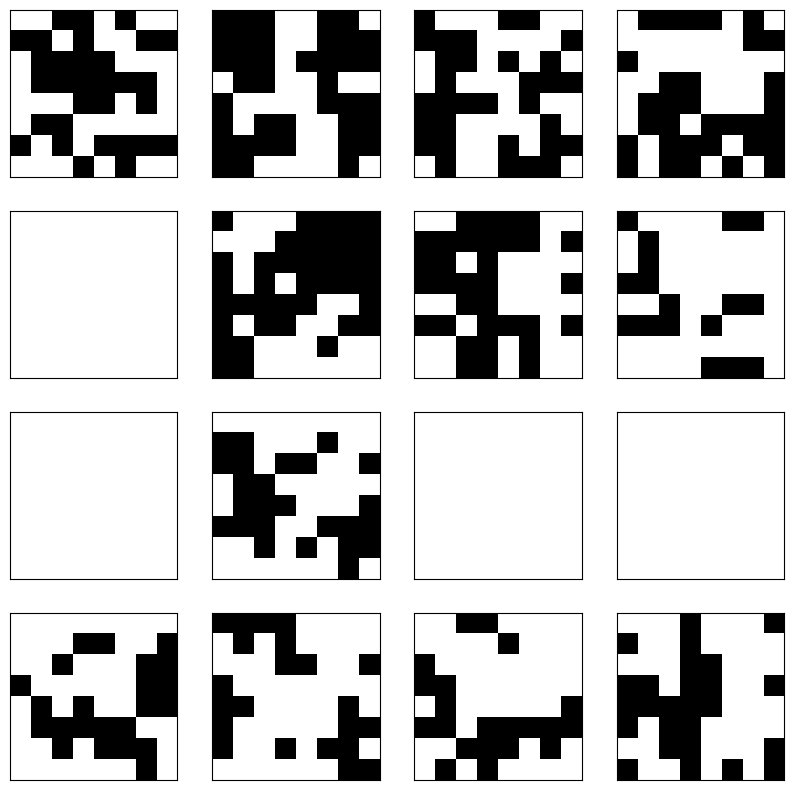

In [83]:
import tensorflow as tf

plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(shuffled_test_images[i], cmap=plt.cm.binary)
plt.show()

In [84]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [85]:
predictions = probability_model.predict(shuffled_test_images)

125/125 [==============================] - 0s 1ms/step


In [86]:
predictions[0]

array([5.7475554e-05, 9.9994254e-01], dtype=float32)

In [87]:
np.argmax(predictions[0])

1

In [89]:
shuffled_test_labels[0]

1

In [90]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

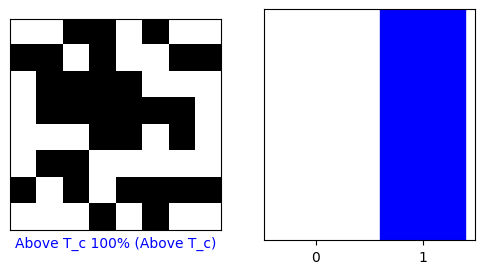

In [91]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], shuffled_test_labels, shuffled_test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], shuffled_test_labels)
plt.show()

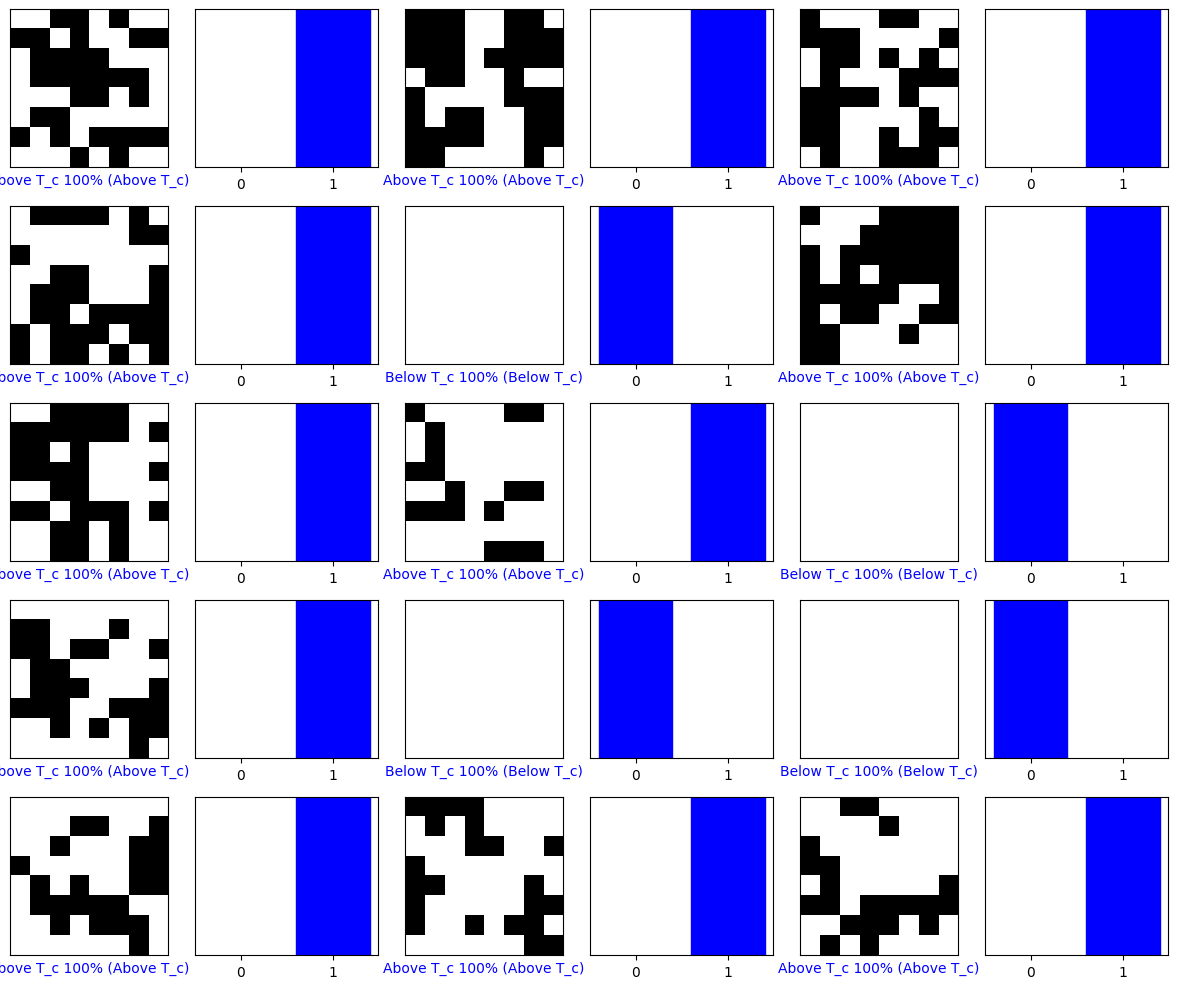

In [92]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], shuffled_test_labels, shuffled_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], shuffled_test_labels)
plt.tight_layout()
plt.show()

## Classifying 8x8 again with more temperatures

In [3]:
import tensorflow as tf

FILENAME = "advancedimage8x8"

TEMP_VALS = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
NUM_TEMPS = len(TEMP_VALS)
NUM_BINS = 1000
TRAIN_BINS = int(0.8 * NUM_BINS)
TEST_BINS = int(0.2 * NUM_BINS)
NUM_TRAIN = int(TRAIN_BINS * NUM_TEMPS)
NUM_TEST = int(TEST_BINS * NUM_TEMPS)

L = 8

import matplotlib.pyplot as plt
import numpy as np

file_string = "../data/spinconfigs/spinConfigs_" + FILENAME + ".txt"

data = np.loadtxt(file_string)

raw_spin_configs = np.zeros(shape=(NUM_TEMPS, NUM_BINS, L, L))

data_dict = {}

# initialize data dictionary
for temp in range(NUM_TEMPS):
    data_dict[TEMP_VALS[temp]] = []

# convert -1s to 0s
for entry in data:
    for index in range(L*L):
        if entry[index] == -1:
            entry[index] = 0

# extract spin configs values 
for temp in range(NUM_TEMPS):
    for bin in range(NUM_BINS):            
        raw_spin_configs[temp][bin] = data[(temp * NUM_BINS) + bin].reshape(L, L)

# populate data dictionary with numpy array of temps
for temp in range(NUM_TEMPS):
    data_dict[TEMP_VALS[temp]] = raw_spin_configs[temp]

# initialize arrays for training and testing images and labels
train_images = np.zeros(shape=(NUM_TRAIN, L, L))
shuffled_images = train_images

train_labels = np.zeros(NUM_TRAIN, dtype=int)
shuffled_labels = train_labels

test_images = np.zeros(shape=(NUM_TEST, L, L))
shuffled_test_images = test_images

test_labels = np.zeros(NUM_TEST, dtype=int)
shuffled_test_labels = test_labels


# populate train images and train labels with spin configs
offset = 0
for temp, array in data_dict.items():
    train_images[(TRAIN_BINS * offset):(TRAIN_BINS * (offset+1))] = array[0:TRAIN_BINS]
    test_images[(TEST_BINS * offset):(TEST_BINS * (offset+1))] = array[TRAIN_BINS:]
    
    # if lower than T_c, should be a 0
    if temp < 2.269:
        train_labels[(TRAIN_BINS * offset):(TRAIN_BINS * (offset+1))] = np.zeros(TRAIN_BINS)
        test_labels[(TEST_BINS * offset):(TEST_BINS * (offset+1))] = np.zeros(TEST_BINS)
    else:
        train_labels[(TRAIN_BINS * offset):(TRAIN_BINS * (offset+1))] = np.ones(TRAIN_BINS)
        test_labels[(TEST_BINS * offset):(TEST_BINS * (offset+1))] = np.ones(TEST_BINS)
    
    offset += 1


def shuffle_pairs(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

# shuffle our images and labels according to the same permutation
shuffled_images, shuffled_labels = shuffle_pairs(train_images, train_labels)

# shuffle test images and labels
shuffled_test_images, shuffled_test_labels = shuffle_pairs(test_images, test_labels)

2024-03-08 11:29:59.837281: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(L, L)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

2024-03-08 11:30:05.558352: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [4]:
model.fit(shuffled_images, shuffled_labels, epochs=20)

NameError: name 'model' is not defined

In [102]:
test_loss, test_acc = model.evaluate(shuffled_test_images,  shuffled_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

57/57 - 0s - loss: 0.1598 - accuracy: 0.9506 - 420ms/epoch - 7ms/step

Test accuracy: 0.9505555629730225


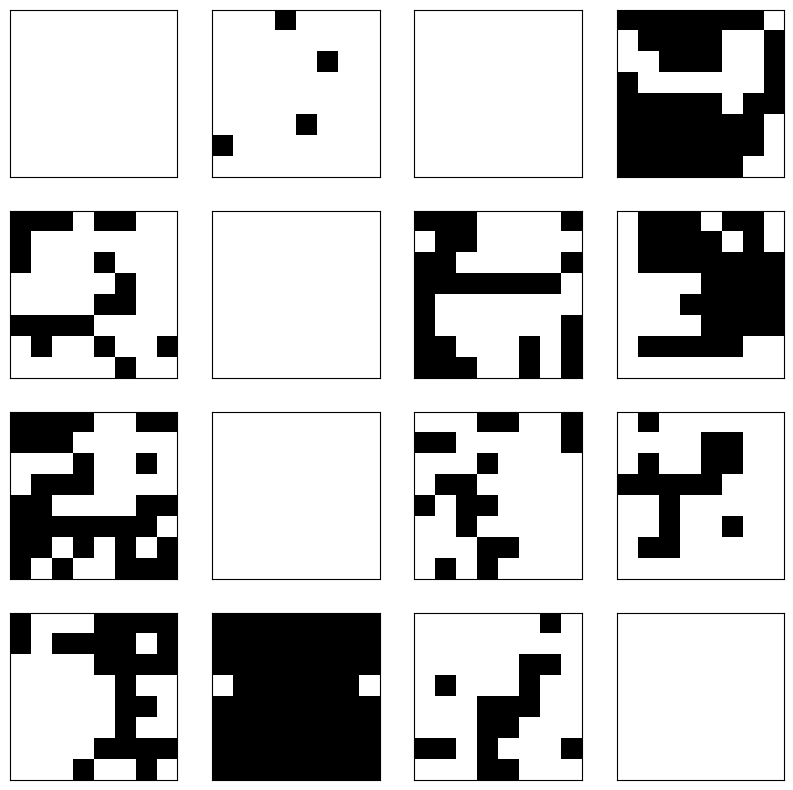

In [103]:
import tensorflow as tf

plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(shuffled_test_images[i], cmap=plt.cm.binary)
plt.show()

In [104]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [105]:
predictions = probability_model.predict(shuffled_test_images)

57/57 [==============================] - 0s 2ms/step


In [1]:
print(predictions)

NameError: name 'predictions' is not defined

In [106]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

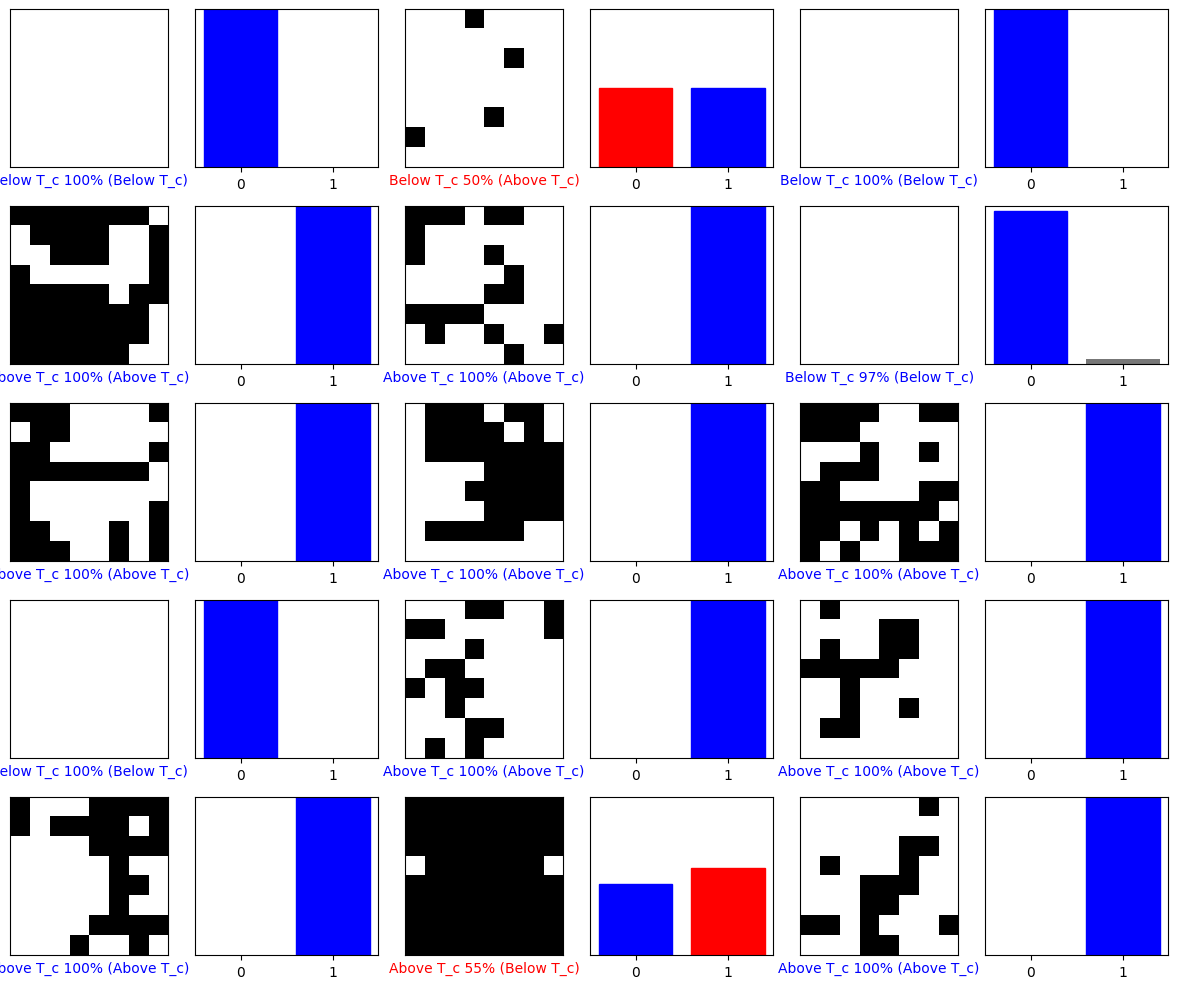

In [108]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], shuffled_test_labels, shuffled_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], shuffled_test_labels)
plt.tight_layout()
plt.savefig("8x8range.png", bbox_inches='tight')
plt.show()

## Basic XY model 

In [8]:
import tensorflow as tf

FILENAME = "xyadvanced4x4"

TEMP_VALS = [0.5, 4.5]
NUM_TEMPS = len(TEMP_VALS)
NUM_BINS = 1000
TRAIN_BINS = int(0.8 * NUM_BINS)
TEST_BINS = int(0.2 * NUM_BINS)
NUM_TRAIN = int(TRAIN_BINS * NUM_TEMPS)
NUM_TEST = int(TEST_BINS * NUM_TEMPS)

L = 4

import matplotlib.pyplot as plt
import numpy as np

file_string = "../data/spinconfigs/spinConfigs_" + FILENAME + ".txt"

data = np.loadtxt(file_string)

raw_spin_configs = np.zeros(shape=(NUM_TEMPS, NUM_BINS, L, L))

data_dict = {}

# initialize data dictionary
for temp in range(NUM_TEMPS):
    data_dict[TEMP_VALS[temp]] = []

# convert -1s to 0s
for entry in data:
    for index in range(L*L):
        if entry[index] == -1:
            entry[index] = 0

# extract spin configs values 
for temp in range(NUM_TEMPS):
    for bin in range(NUM_BINS):            
        raw_spin_configs[temp][bin] = data[(temp * NUM_BINS) + bin].reshape(L, L)

# populate data dictionary with numpy array of temps
for temp in range(NUM_TEMPS):
    data_dict[TEMP_VALS[temp]] = raw_spin_configs[temp]

# initialize arrays for training and testing images and labels
train_images = np.zeros(shape=(NUM_TRAIN, L, L))
shuffled_images = train_images

train_labels = np.zeros(NUM_TRAIN, dtype=int)
shuffled_labels = train_labels

test_images = np.zeros(shape=(NUM_TEST, L, L))
shuffled_test_images = test_images

test_labels = np.zeros(NUM_TEST, dtype=int)
shuffled_test_labels = test_labels


# populate train images and train labels with spin configs
offset = 0
for temp, array in data_dict.items():
    train_images[(TRAIN_BINS * offset):(TRAIN_BINS * (offset+1))] = array[0:TRAIN_BINS]
    test_images[(TEST_BINS * offset):(TEST_BINS * (offset+1))] = array[TRAIN_BINS:]
    
    # if lower than T_c, should be a 0
    if temp < 2.269:
        train_labels[(TRAIN_BINS * offset):(TRAIN_BINS * (offset+1))] = np.zeros(TRAIN_BINS)
        test_labels[(TEST_BINS * offset):(TEST_BINS * (offset+1))] = np.zeros(TEST_BINS)
    else:
        train_labels[(TRAIN_BINS * offset):(TRAIN_BINS * (offset+1))] = np.ones(TRAIN_BINS)
        test_labels[(TEST_BINS * offset):(TEST_BINS * (offset+1))] = np.ones(TEST_BINS)
    
    offset += 1


def shuffle_pairs(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

# shuffle our images and labels according to the same permutation
shuffled_images, shuffled_labels = shuffle_pairs(train_images, train_labels)

# shuffle test images and labels
shuffled_test_images, shuffled_test_labels = shuffle_pairs(test_images, test_labels)

In [9]:
print(test_images[0])

[[4.62963733 5.27692364 4.7608525  4.51389056]
 [5.7307679  5.2352133  5.17664454 5.46540952]
 [5.5226462  5.03317593 4.68188527 4.80876399]
 [4.48892523 4.73007476 4.25651242 4.6108651 ]]


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(L, L)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(shuffled_images, shuffled_labels, epochs=20)

Epoch 1/20
50/50 [==============================] - 1s 3ms/step - loss: 0.6060 - accuracy: 0.7150
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 0.5071 - accuracy: 0.8300
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.8544
Epoch 4/20
50/50 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.8744
Epoch 5/20
50/50 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.8788
Epoch 6/20
50/50 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.8819
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 0.3884 - accuracy: 0.8931
Epoch 8/20
50/50 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.8906
Epoch 9/20
50/50 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 0.8950
Epoch 10/20
50/50 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.8938
Epoch 11/20
50/50 [

In [13]:
test_loss, test_acc = model.evaluate(shuffled_test_images,  shuffled_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

13/13 - 0s - loss: 0.4403 - accuracy: 0.8850 - 250ms/epoch - 19ms/step

Test accuracy: 0.8849999904632568


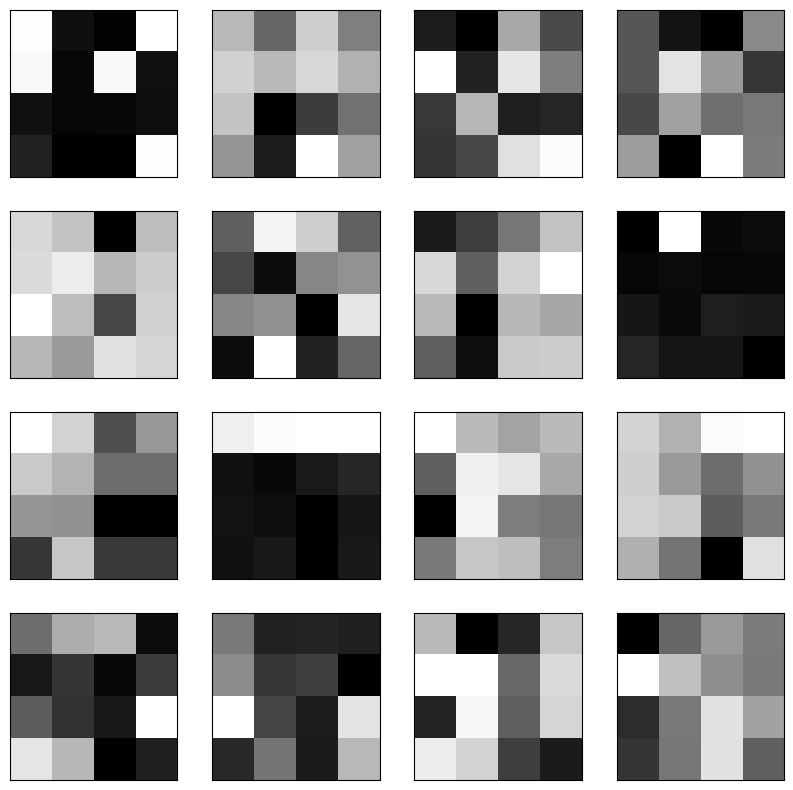

In [14]:
import tensorflow as tf

plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(shuffled_test_images[i], cmap=plt.cm.binary)
plt.show()

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(shuffled_test_images)

13/13 [==============================] - 0s 2ms/step


In [17]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

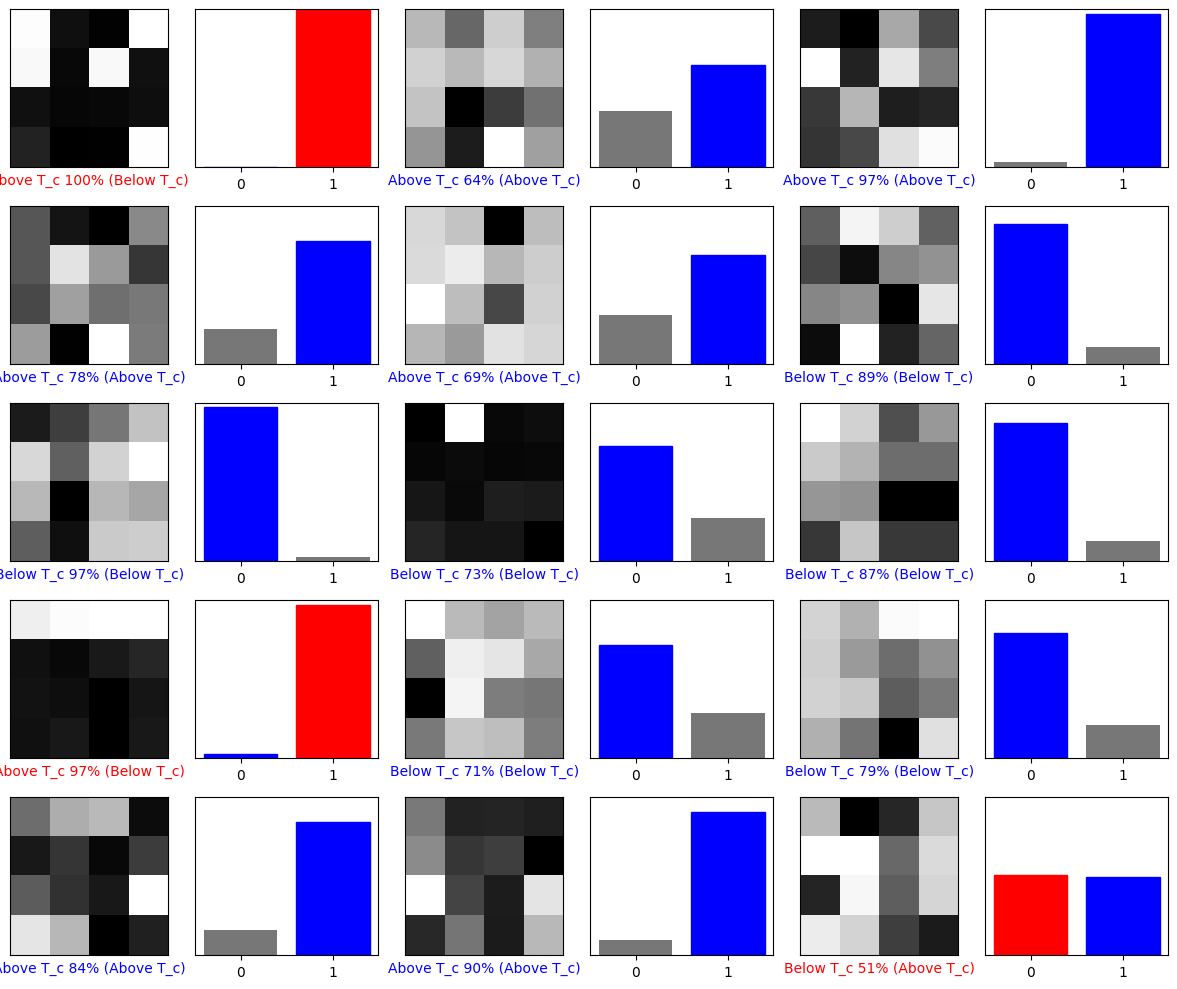

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], shuffled_test_labels, shuffled_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], shuffled_test_labels)
plt.tight_layout()
plt.savefig("8x8range.png", bbox_inches='tight')
plt.show()